In [1]:
# importing some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import scipy.stats
from scipy.stats import pearsonr

from fbprophet import Prophet
from sklearn import metrics

### loading and preparing the data

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 7)

In [4]:
# marking all missing values
df.replace('?', 'nan', inplace=True)

# converting dataset to numeric
df = df.astype('float32')

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [7]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

## PART B

### QUESTION 11. 

### Resample the data from a minute sampling rate to a daily sampling rate (i.e sum over the minutes for each day). Also, fill all the missing values with the mean (average) of their attribute/column. Which of the following is a plot of the daily global_active_power over time?

In [8]:
#filling the missing values

df = df.fillna(df.mean())

In [9]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# From the instructions given, Resampling to daily sampling rates

df_daily = df.resample('D').sum()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


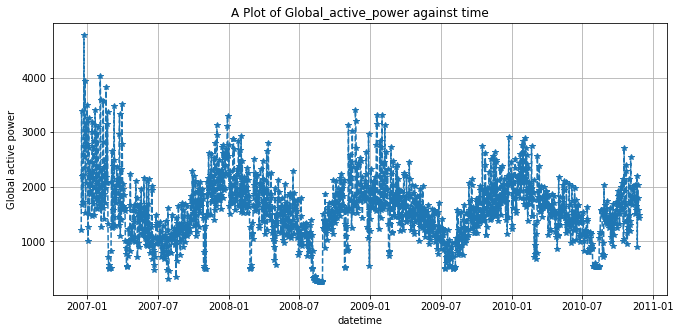

In [11]:
# making the plot

plt.figure(figsize=(11,5))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('Global active power')
plt.title('A Plot of Global_active_power against time');

### QUESTION 12. 

### What is the Pearson correlation coefficient between the global_active_power and global_reactive_power? To 2 decimal places.

In [12]:
corre1,_ = pearsonr(df_daily.Global_active_power, df_daily.Global_reactive_power)
corre1

### QUESTION 13. 

### What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 decimal places.

In [13]:
corre2,_ = pearsonr(df_daily.Voltage,df_daily.Global_intensity)
corre2

### QUESTION 14. 

### Using the daily sampling rate (sum), divide the data into a train and test set. The last 365 days is your test set and the first (x-365) days is your training set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series modeling using this time column (‘dt’ or ‘ds’) and the global_active_power (or ‘y’). Answer question 14 - 16

### Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [14]:
df_daily.shape

(1442, 7)

In [15]:
# since 1442-365 = 1077, indexing the first 1077 rows of our data as train set

train_dataset = df_daily.iloc[:1077,:]

In [16]:
train_dataset.shape

(1077, 7)

In [17]:
# the last rows i.e 365 rows are indexed as the test set

test_dataset = df_daily.iloc[1077:,:]

In [18]:
test_dataset.shape

(365, 7)

In [19]:
# importing facebook prophet

from fbprophet import Prophet

In [20]:
train_dataset.reset_index(inplace = True)
train_dataset.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [21]:
train_df = train_dataset.iloc[:,:2]

In [22]:
train_df = train_df.rename(columns={"datetime": "ds", "Global_active_power": "y"})
train_df.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [23]:
test_dataset.reset_index(inplace = True)
test_dataset.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [24]:
tests_df = test_dataset.iloc[:,:2]

In [25]:
tests_df = tests_df.rename(columns={"datetime": "ds", "Global_active_power": "y"})
tests_df.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [26]:
model = Prophet()
model.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [27]:
predictions = model.predict(tests_df) 
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1585.623718,1556.130923,2629.008333,1585.623718,1585.623718,518.626246,518.626246,518.626246,-64.110636,-64.110636,-64.110636,582.736882,582.736882,582.736882,0.0,0.0,0.0,2104.249963
1,2009-11-28,1585.767711,1822.365384,2967.548010,1585.767711,1585.767711,821.948285,821.948285,821.948285,245.832699,245.832699,245.832699,576.115587,576.115587,576.115587,0.0,0.0,0.0,2407.715997
2,2009-11-29,1585.911705,1811.397527,2916.407962,1585.911705,1585.911705,796.051995,796.051995,796.051995,228.534519,228.534519,228.534519,567.517476,567.517476,567.517476,0.0,0.0,0.0,2381.963700
3,2009-11-30,1586.055699,1393.183903,2512.802459,1586.055699,1586.055699,396.149743,396.149743,396.149743,-161.297724,-161.297724,-161.297724,557.447467,557.447467,557.447467,0.0,0.0,0.0,1982.205442
4,2009-12-01,1586.199693,1561.840734,2719.660269,1586.199693,1586.199693,517.091635,517.091635,517.091635,-29.338979,-29.338979,-29.338979,546.430614,546.430614,546.430614,0.0,0.0,0.0,2103.291328


In [28]:
#yhat is the prediction.

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2104.249963,1556.130923,2629.008333,1585.623718,1585.623718,1585.623718
1,2009-11-28,2407.715997,1822.365384,2967.548010,1585.767711,1585.767711,1585.767711
2,2009-11-29,2381.963700,1811.397527,2916.407962,1585.911705,1585.911705,1585.911705
3,2009-11-30,1982.205442,1393.183903,2512.802459,1586.055699,1586.055699,1586.055699
4,2009-12-01,2103.291328,1561.840734,2719.660269,1586.199693,1586.199693,1586.199693


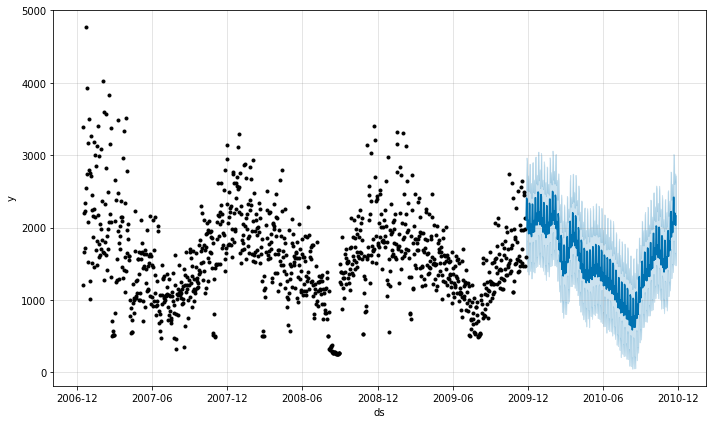

In [29]:
model.plot(predictions)
plt.show()

In [30]:
from sklearn import metrics

In [31]:
def Metric(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [32]:
MAPE = Metric(tests_df['y'], predictions['yhat'])
round(MAPE,2)

20.96

### QUESTION 15. 

### What is the RMSE in 2 decimal places?

In [33]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(tests_df['y'], predictions['yhat']))
RMSE
round(RMSE,2)

375.44

### QUESTION 16. 

### If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?

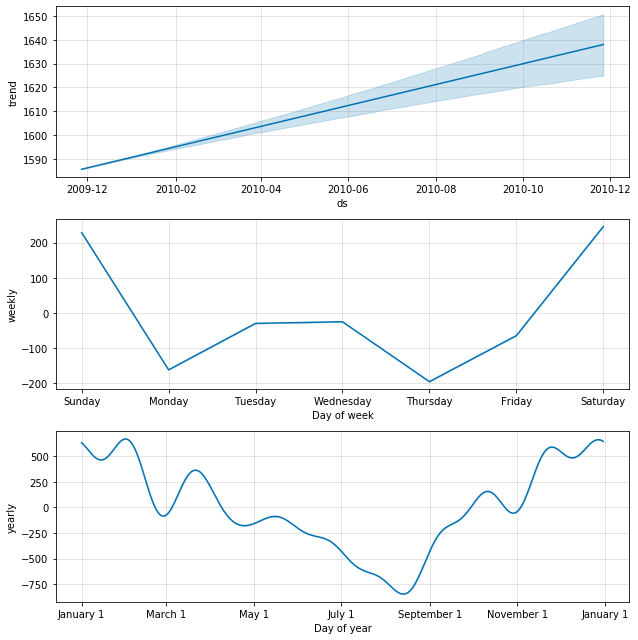

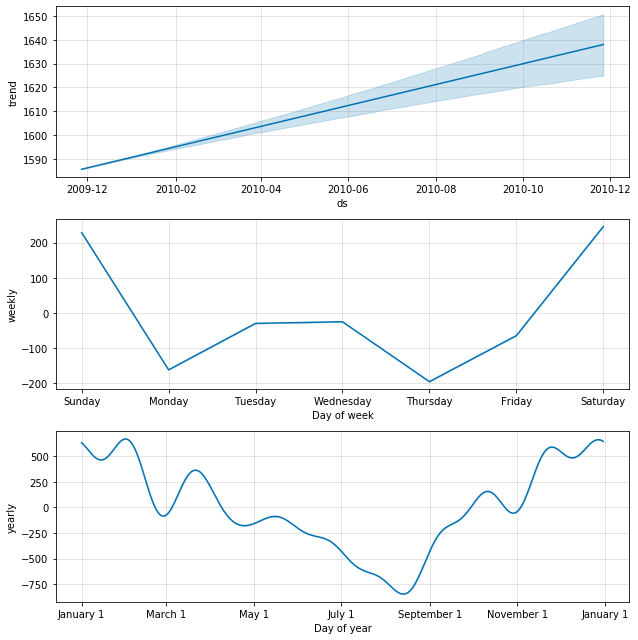

In [34]:
model.plot_components(predictions)

#### The month of August has the lowest value

### QUESTION 17. 

### Multivariate Time Series Forecasting with Facebook Prophet

### In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the six independent variables ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3'] will be [‘add1’, ‘add2’, ‘add3’, ‘add4’, ‘add5’, ‘add6’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last 365 days of the house consumption (‘global_active_power’). Answer question 17-19:

### Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

In [35]:
df_daily.reset_index(inplace=True)

In [36]:
df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [37]:
# renaming the columns

New_df_daily = df_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [38]:
New_df_daily.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [39]:
New_train = New_df_daily.iloc[:1077,:]
New_test = New_df_daily.iloc[1077:,:]
New_test.shape, New_train.shape

((365, 8), (1077, 8))

In [40]:
#creating the model

model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [41]:
model = model.fit(New_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\AJULOR FRESH\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [42]:
prediction = model.predict(New_test)

In [43]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1594.012747,1364.562041,1397.285440,1594.012747,1594.012747,7.536929,7.536929,7.536929,0.614317,...,-0.107125,-0.107125,-0.107125,4.194187,4.194187,4.194187,0.0,0.0,0.0,1380.800441
1,2009-11-28,1594.122603,1846.831214,1876.259273,1594.122603,1594.122603,-8.881309,-8.881309,-8.881309,0.504421,...,1.411050,1.411050,1.411050,4.507042,4.507042,4.507042,0.0,0.0,0.0,1861.581379
2,2009-11-29,1594.232459,1627.304793,1659.212799,1594.232459,1594.232459,-2.795769,-2.795769,-2.795769,1.221625,...,0.151581,0.151581,0.151581,4.854432,4.854432,4.854432,0.0,0.0,0.0,1643.873969
3,2009-11-30,1594.342316,1725.798804,1757.662659,1594.342316,1594.342316,3.915389,3.915389,3.915389,1.412448,...,-0.341389,-0.341389,-0.341389,5.241109,5.241109,5.241109,0.0,0.0,0.0,1742.403891
4,2009-12-01,1594.452172,1745.665796,1779.713646,1594.452172,1594.452172,5.965400,5.965400,5.965400,0.938659,...,-1.664786,-1.664786,-1.664786,5.671009,5.671009,5.671009,0.0,0.0,0.0,1762.118668


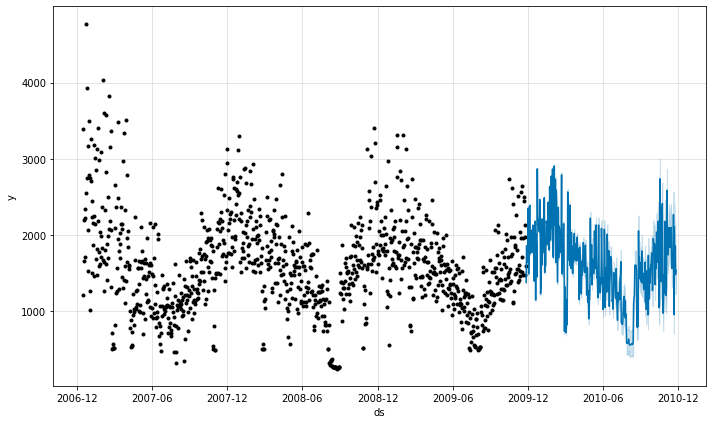

In [44]:
model.plot(prediction)
plt.show()

In [45]:
# calculating the MAPE

MAPE = Metric(New_test['y'],prediction['yhat'])
round(MAPE,2)

2.38

### QUESTION 18. 

### What is the RMSE in 2 decimal places?

In [46]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(New_test['y'],prediction['yhat']))
RMSE
round(RMSE,2)

35.84

### QUESTION 19. 

### If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?

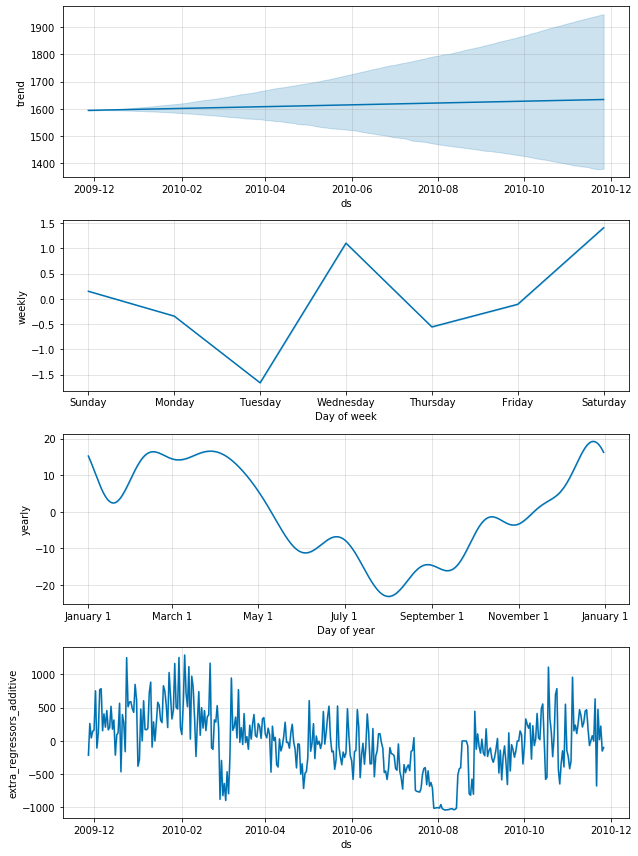

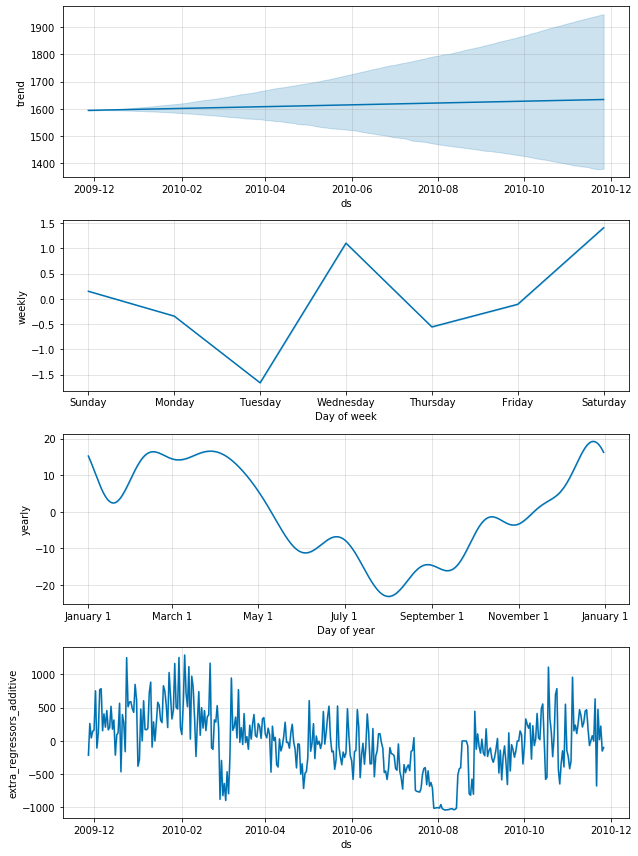

In [47]:
model.plot_components(prediction)

#### We can see from the plot that TUESDAY showed seasonality with the lowest value